Take stock price of any company you want
and predicts its price by using LSTM. Use only
Jupyter notebook code.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - loss: 0.0685 - val_loss: 0.0019
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0097 - val_loss: 0.0032
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0051 - val_loss: 0.0026
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.

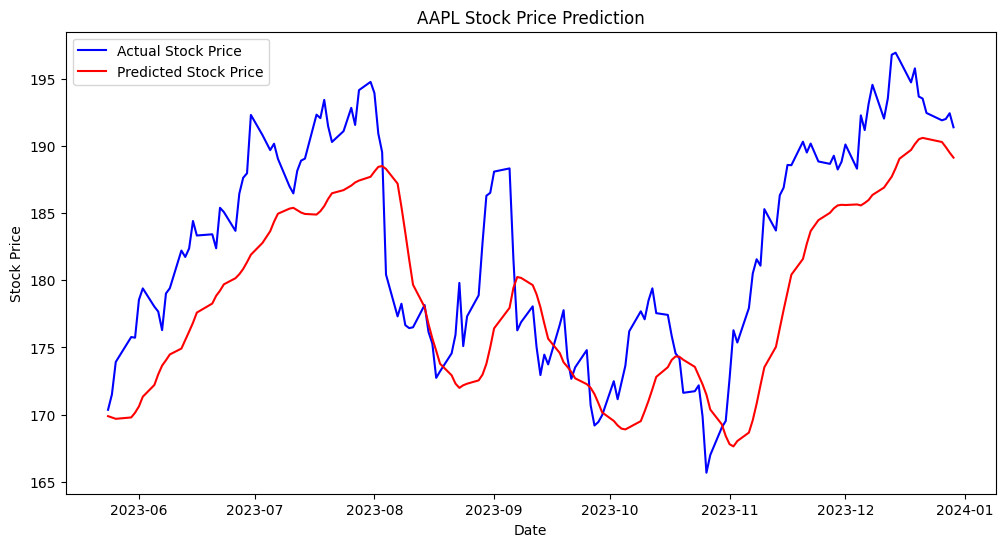

In [2]:
# Install required libraries
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow --quiet

# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Download Stock Data
stock_symbol = "AAPL"  # Change this to any stock symbol (e.g., TSLA, MSFT)
df = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")
df = df[['Close']]  # Using only the "Close" price

# Step 2: Preprocess Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

# Creating training data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Days used to predict the next day
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Step 3: Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Predict Stock Prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Convert back to original scale

# Step 6: Visualize Results
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+seq_length:], scaler.inverse_transform(test_data[seq_length:]), color='blue', label="Actual Stock Price")
plt.plot(df.index[train_size+seq_length:], predicted_prices, color='red', label="Predicted Stock Price")
plt.title(f"{stock_symbol} Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
